**커스텀 데이터 추론하기** <br>
CIFAR10 데이터셋을 CNN으로 트레이닝한 후, 추론파일을 가지고 커스텀 데이터를 추론해보기.
feed-forward를 실행하는 것이다. 
제일 먼저 추론에 필요한 파이썬 라이브러리를 임포트 한다. 

In [1]:
from tensorflow.keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np
from google.colab.patches import cv2_imshow

**추론파일 로드하기** <br>
추론파일은 CIFAR10 데이터셋을 이용하여 CNN으로 트레이닝한 계수를 모아놓은 것이다. 이 추론파일에 이미지를 벡터적으로 곱하면 추론을 할 수 있다. 

In [2]:
model = load_model('./cifar10_cnn.h5')

CIFAR10 데이터셋 라벨 참고용

In [3]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

**커스텀 이미지 로드** <br>
내가 판단하고 싶은 커스텀 이미지를 OpenCV를 이용해서 로드한다. 당연히 CIFAR10 데이터셋 라벨 중에 있는 이미지로 올려야 한다. 

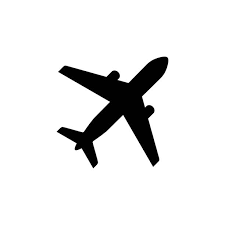

In [4]:
# 내가 판단할 이미지를 로드 OpenCV로 한다.
img = cv2.imread('./plane2.png')
cv2_imshow(img)
cv2.waitKey(2000)
cv2.destroyAllWindows()


**이미지 리사이즈** <br>
우리가 인터넷에서 선택한 이미지는 당연히 CIFAR10 데이터셋의 크기인 32x32x3이 아니기 때문에 이미지 사이즈를 조정한다. 

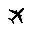

In [5]:
img_resized = cv2.resize(img, (32,32))
cv2_imshow(img_resized)
cv2.waitKey(2000)
cv2.destroyAllWindows()

**이미지 노말라이징** <br>
이미지 데이터를 구성하는 숫자는 0 ~ 255 수준인데 이것을 0 ~ 1로 조정해야 텐서플로 계산이 편리하다.

In [6]:
# Normalizing 
img_norm = img_resized.astype('float')/255.0
print(img_norm)


[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


**추론하기** <br>
이제 커스텀 데이터를 추론파일에 벡터적으로 곱해서 추론결과를 얻는다. 

In [7]:
# 추론하기, inference, feed-forward 
## X -> img_flat에 []을 한번더 씌운 것 
X = np.asarray([img_norm])
#print(X.shape)
# 여기서 입력이미지를 추론파일에 곱하는 것 
## return 값은 softmax
predictions = model(X, training=False)
print(predictions)
print(np.argmax(predictions))

tf.Tensor(
[[9.9997258e-01 2.5636988e-08 2.7283604e-05 8.4906761e-15 1.2071991e-10
  3.5954113e-08 3.2311299e-11 5.9089832e-14 2.0273715e-16 7.2325914e-14]], shape=(1, 10), dtype=float32)
0
